## 1. 이미지에 콧수염붙이기(얼굴 각도에 상관없이)

### 1-a. 이미지 불러오기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

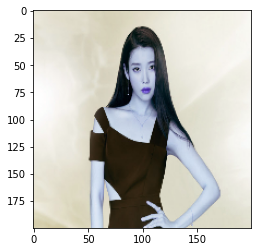

In [2]:
import os

file_path = ['image','image1','image2','image3','image4','image5']

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+ 'image'+'.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (200, 200))    
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

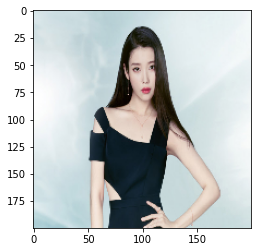

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 1-b. 얼굴좌표 찾기

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(79, 41) (122, 84)]]


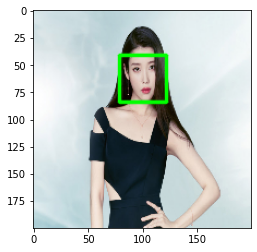

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 1-c. landmark 불러오기

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


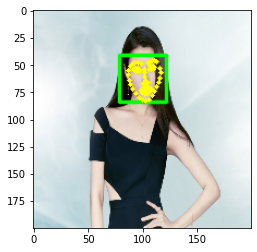

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(103, 64)
(x,y) : (103,64)
(w,h) : (44,44)


### 1-d. 스터커 불러오기

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(44, 44, 3)


### 1-e. 스티커이미지를 이미지에 부착(weight 조절 포함)

In [12]:
refined_x = x - w//2 #스티커 이미지의 시작 x좌표
refined_y = y - h//2 #스티커 이미지의 시작 y좌표

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (81,42)


In [13]:
sticker_area = img_show[refined_y: refined_y + img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]

dst = cv2.addWeighted(img_show[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]], 0.7, img_sticker, 0.3, 0)
img_show[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(dst==0,sticker_area,dst).astype(np.uint8)

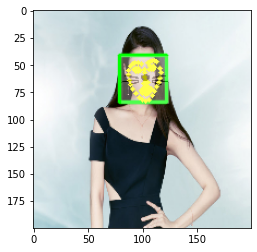

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

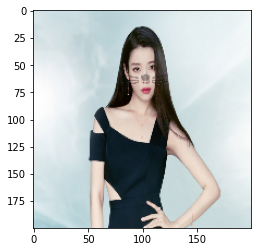

In [15]:
#붙일 영역에 대한 crop
sticker_area = img_bgr[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

#addWeight으로 두이미지의 weight 조절
dst = cv2.addWeighted(img_bgr[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]], 0.7, img_sticker, 0.3, 0)
img_bgr[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,dst).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 얼굴 각도가 다를 때 detection

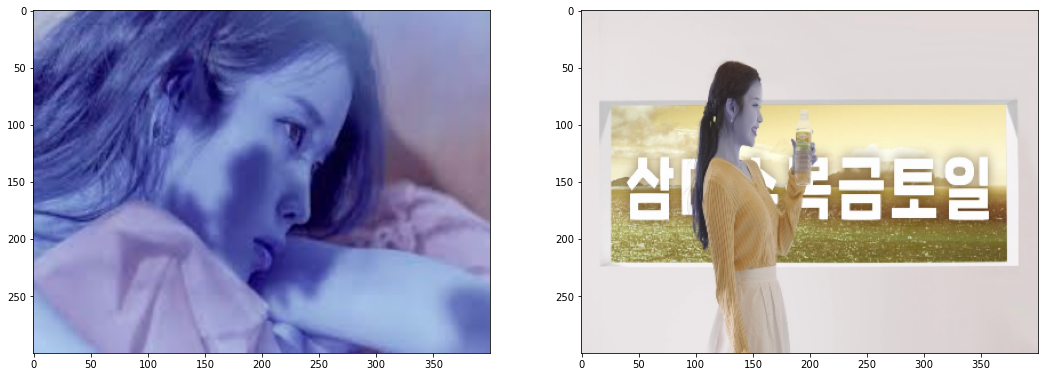

In [16]:
file_path = ['image6','image9']
img_bgrs = []
img_shows = []
fig = plt.figure(figsize = (18, 15))

for i, file in enumerate(file_path):
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+ file +'.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (400, 300))    
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_bgrs.append(img_bgr)
    img_shows.append(img_show)
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(img_show)    

plt.show()

In [17]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [18]:
img_rgbs = []
dlib_rects_list = []
fig = plt.figure(figsize = (24, 18))

for i, img_bgr in enumerate(img_bgrs):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgbs.append(img_rgb)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    dlib_rects_list.append(dlib_rects)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_shows[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        img_show_rgb =  cv2.cvtColor(img_shows[i], cv2.COLOR_BGR2RGB)
        ax = fig.add_subplot(1, 2, i + 1)
        ax.imshow(img_show_rgb)
plt.show()

<Figure size 1728x1296 with 0 Axes>

**이미지에서 얼굴을 detect한 결과가 나오지 않는다.,**

얼굴의 각도가 앞을 향하고 있지않고 옆을 보고 있으면 hog based detector가 얼굴을 detect하지 못한다.

## 3. 이미지 밝기 다를 때 detection

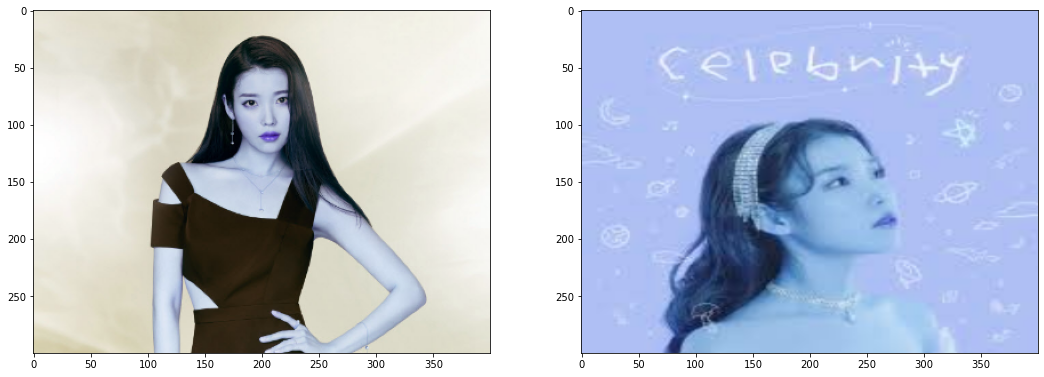

In [19]:
file_path = ['image','image4']
img_bgrs = []
img_shows = []
fig = plt.figure(figsize = (18, 15))

for i, file in enumerate(file_path):
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+ file +'.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (400, 300))    
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_bgrs.append(img_bgr)
    img_shows.append(img_show)
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(img_show)    
    
plt.show()

In [20]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

100만큼 줄여본다

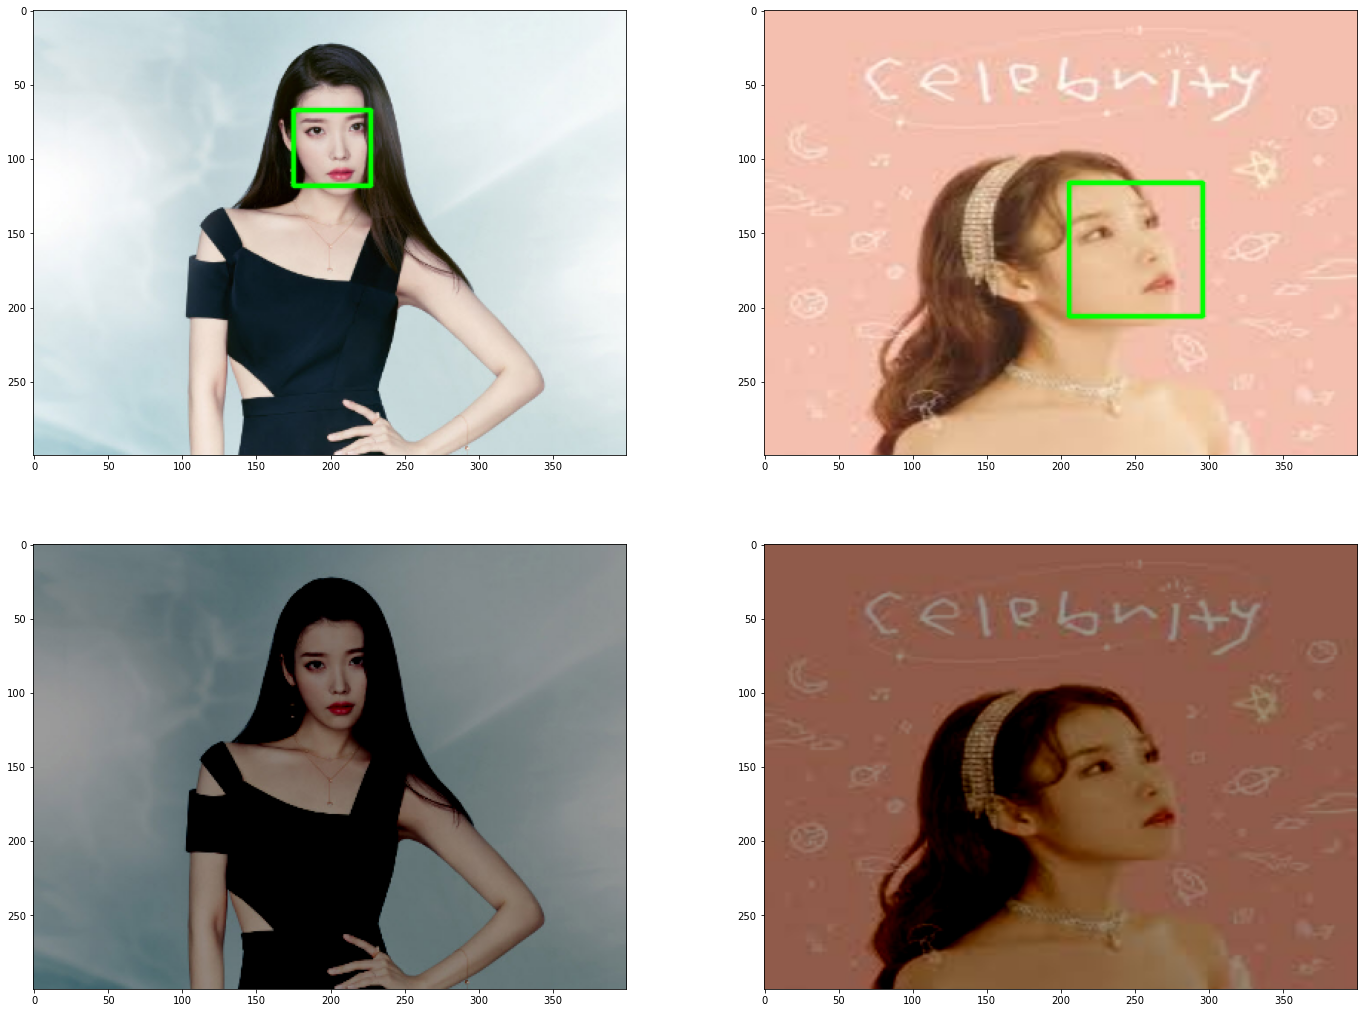

In [21]:
img_rgbs = []
dlib_rects_list = []
fig = plt.figure(figsize = (24, 18))

for i, img_bgr in enumerate(img_bgrs):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgbs.append(img_rgb)
    
    val = 100 #이미지 밝기를 줄이는 정도(픽셀 값을 줄임)
    array = np.full(img_rgb.shape, (val, val, val), dtype=np.uint8)
    sub_img_rgb= cv2.subtract(img_rgb, array) #이미지 밝기를 줄이는 정도
    
    dlib_rects = detector_hog(sub_img_rgb, 1)   #- (image, num of img pyramid)
    dlib_rects_list.append(dlib_rects)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_shows[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        img_show_rgb =  cv2.cvtColor(img_shows[i], cv2.COLOR_BGR2RGB)
        ax1 = fig.add_subplot(2, 2, i + 1)
        ax1.imshow(img_show_rgb)
        ax2 = fig.add_subplot(2, 2, i + 3)
        ax2.imshow(sub_img_rgb)
plt.show()

200만큼 줄여본다

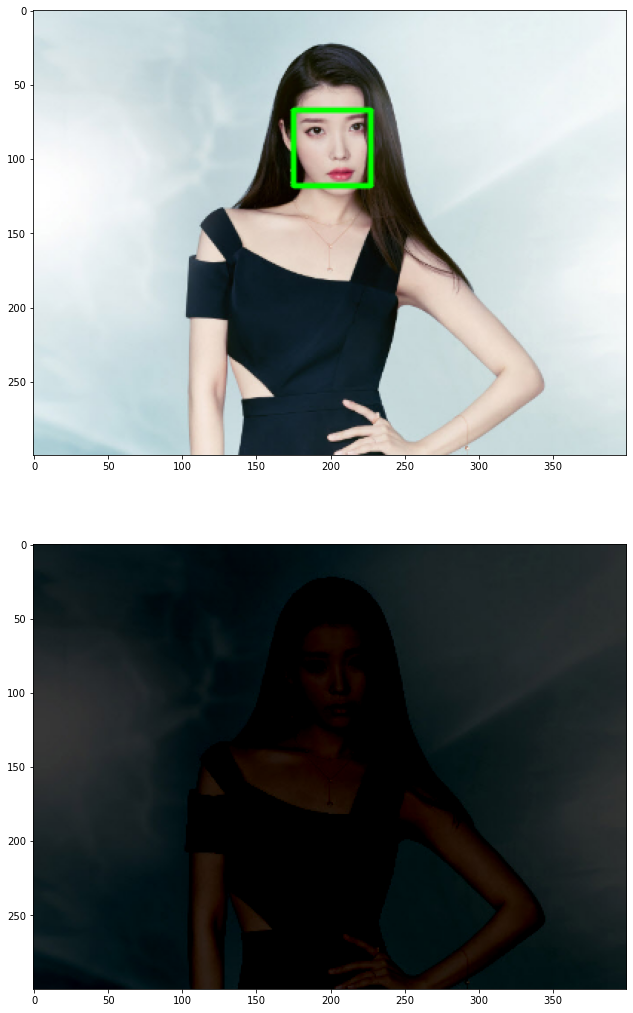

In [22]:
img_rgbs = []
dlib_rects_list = []
fig = plt.figure(figsize = (24, 18))

for i, img_bgr in enumerate(img_bgrs):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgbs.append(img_rgb)
    
    val = 200 #이미지 밝기를 줄이는 정도(픽셀 값을 줄임)
    array = np.full(img_rgb.shape, (val, val, val), dtype=np.uint8)
    sub_img_rgb= cv2.subtract(img_rgb, array) #이미지 밝기를 줄이는 정도
    
    dlib_rects = detector_hog(sub_img_rgb, 1)   #- (image, num of img pyramid)
    dlib_rects_list.append(dlib_rects)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_shows[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        img_show_rgb =  cv2.cvtColor(img_shows[i], cv2.COLOR_BGR2RGB)
        ax1 = fig.add_subplot(2, 2, i + 1)
        ax1.imshow(img_show_rgb)
        ax2 = fig.add_subplot(2, 2, i + 3)
        ax2.imshow(sub_img_rgb)
plt.show()

원래 2개의 이미지모두 얼굴이 detect되었다면 밝기를 200정도 줄이니 한 이미지는 detect하지 못한 것을 확인할 수 있다.

## Bonus 얼굴각도가 다를 때(콧수염 붙이기)

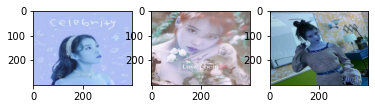

In [23]:
file_path = ['image4','image7','image8']
#file_path = ['image4']
img_bgrs = []
img_shows = []
fig = plt.figure()

for i, file in enumerate(file_path):
    my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/'+ file +'.jpg'
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (400, 300))    
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_bgrs.append(img_bgr)
    img_shows.append(img_show)
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(img_show)    

plt.show()

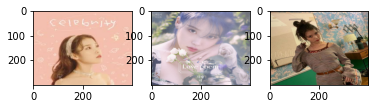

In [24]:
fig = plt.figure()
for i, img_bgr in enumerate(img_bgrs):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(img_rgb)
plt.show()

In [25]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

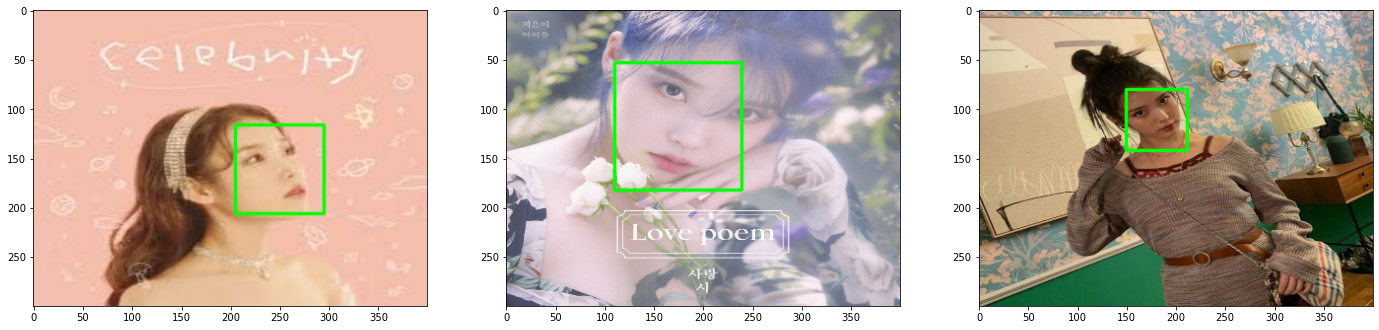

In [26]:
img_rgbs = []
dlib_rects_list = []
fig = plt.figure(figsize = (24, 18))

for i, img_bgr in enumerate(img_bgrs):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgbs.append(img_rgb)
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    dlib_rects_list.append(dlib_rects)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_shows[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
        img_show_rgb =  cv2.cvtColor(img_shows[i], cv2.COLOR_BGR2RGB)
        ax = fig.add_subplot(1, 3, i + 1)
        ax.imshow(img_show_rgb)
plt.show()

In [27]:
dlib_rects_list

[rectangles[[(205, 116) (295, 206)]],
 rectangles[[(110, 53) (239, 182)]],
 rectangles[[(149, 80) (211, 142)]]]

In [28]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [29]:
from collections import defaultdict

In [30]:
land_mark_dict = defaultdict(list) #각 그림의 landmark를 닮는 dictionary
for i, dlib_rects in enumerate(dlib_rects_list):
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgbs[i], dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        land_mark_dict[file_path[i]].append(list_points)

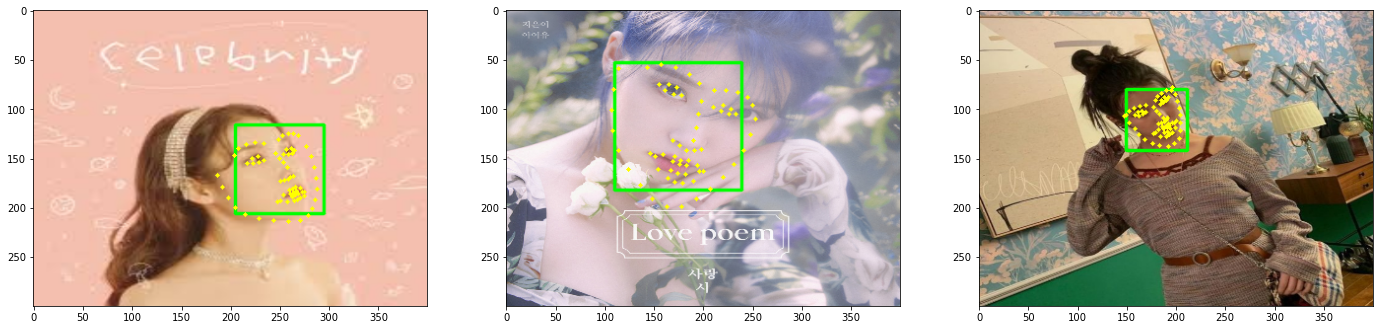

In [31]:
fig = plt.figure(figsize = (24, 18))

for i, key in enumerate(land_mark_dict.keys()):
    for land_mark in land_mark_dict[key]:
        for point in land_mark:
            cv2.circle(img_shows[i], point, 2, (0, 255, 255), -1) # yellow
    ax = fig.add_subplot(1, 3, i + 1)
    img_show_rgb = cv2.cvtColor(img_shows[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_show_rgb)
   
plt.show()

In [32]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

In [33]:
import math

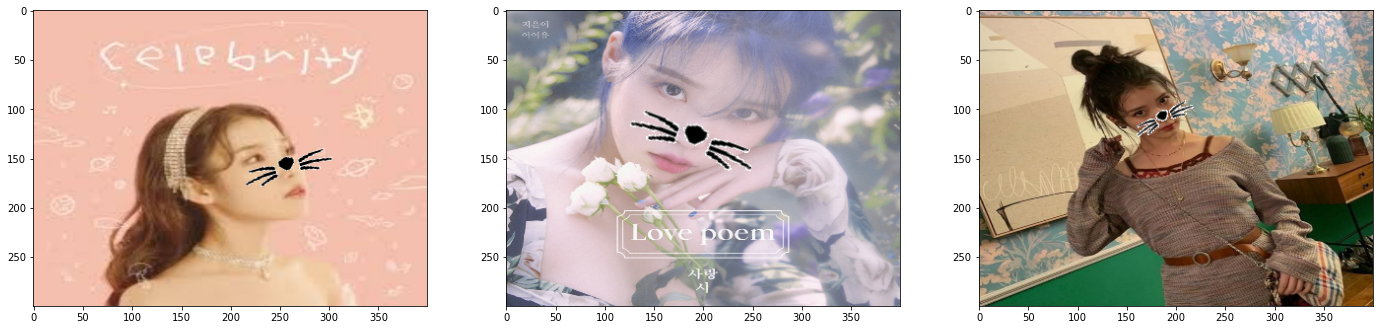

In [34]:
i = 0

fig = plt.figure(figsize = (24, 18))

for dlib_rects, key in zip(dlib_rects_list, land_mark_dict.keys()):
    for dlib_rect, landmark in zip(dlib_rects, land_mark_dict[key]):
        
        # 두 눈 끝의 기울기를 통하여 코가 어느정도 기울었는지 가늠할 수 있다
        x_1 = landmark[39][0]
        y_1 = landmark[39][1]
        x_2 = landmark[42][0]
        y_2 = landmark[42][1]
        
        
        w = dlib_rect.width()
        h = dlib_rect.width()
        
        refined_x = landmark[30][0] - w//2 #스티커의 시작지점에 대한 x좌표
        refined_y = landmark[30][1] - h//2 #스티커의 시작지점에 대한 y좌표
        
        
        img_sticker = cv2.resize(img_sticker, (w,h))
        
        # -를 해주는 이유 : 분명 y2좌표가 y1좌표보다 위에 있는 것은 맞지만 그림에서는 위에있을수록 음수값을 갖는다.
        # 음수 
        angle = math.atan(-(y_2 - y_1) / (x_2 - x_1))/math.pi*180 
        
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1) # 스티커를 기준으로 구한 angle 만큼 회전
        
        rot_img_sticker = cv2.warpAffine(img_sticker, M, (img_sticker.shape[0],img_sticker.shape[1]), borderValue=(255,255,255))
    
        img_bgr = img_bgrs[i]
    
        sticker_area = img_bgr[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
        img_bgr[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(rot_img_sticker==255,sticker_area,rot_img_sticker).astype(np.uint8)
    
        ax = fig.add_subplot(1, 3, i + 1)
        ax.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        i = i + 1
plt.show()

## 회고 

먼저, 고양이 수염을 머리에서 코로 내리는데 어려움을 겪었었다.

이는 수염을 붙이고 싶은 이미지의 landmark를 통해 좌표를 얻고, 적당한 사이즈(균형이 맞도록)로 crop을 해주고, 스티커 이미지를 원래이미지에 대체하는 그 과정에 대한 이해를 하면서 코로 수염을 이동시킬 수 있었던 것 같다. 

그 뒤로는 작업이 훨씬 수월했는데 프로젝트에서 재밌었던 것은 얼굴 각도가 좀 바뀌었을 때 고양이 수염을 회전시켜 보다 자연스럽게 맞춰주는 것이였다.

또한 hog-detection의 단점을 확인해볼 수 있었는데 얼굴각도가 정면이아닌 다른 곳을 향할 경우 대부분 detection하지 못함을 확인해볼 수 있었다. 이는 찾아보니 이는 cnn based detection을 통해 해결할 수 있다고 하는데 추후 그에 관련되어 실험을 해보고 싶다.